In [19]:
import numpy as np
# İlk veri seti
X = [1, 2, 3, 4, 5]

Y = [10, 20, 30, 40, 50]



X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

In [6]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')

hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_split=0.1)
#X_train = df[['X']].values  # DataFrame'den NumPy dizisine dönüştürme
#Y_train = df['Y'].values    # DataFrame'den NumPy dizisine dönüştürme

Epoch 1/100
1/1 [==============================] - 1s 853ms/step - loss: 1.1303 - accuracy: 0.0000e+00 - val_loss: -6.5423 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 66ms/step - loss: -6.5861 - accuracy: 0.0000e+00 - val_loss: -14.2144 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 57ms/step - loss: -14.8824 - accuracy: 0.0000e+00 - val_loss: -23.6917 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 38ms/step - loss: -24.8943 - accuracy: 0.0000e+00 - val_loss: -36.6176 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 54ms/step - loss: -38.6465 - accuracy: 0.0000e+00 - val_loss: -57.5533 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 56ms/step - loss: -60.8027 - accuracy: 0.0000e+00 - val_loss: -95.5683 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 57ms/step - loss: -100.9211 - accurac

In [25]:
model.evaluate(X_test, Y_test)[1] # 1 loss 2 metrics

1/1 [==============================] - 0s 27ms/step - loss: nan - accuracy: 0.0000e+00


0.0

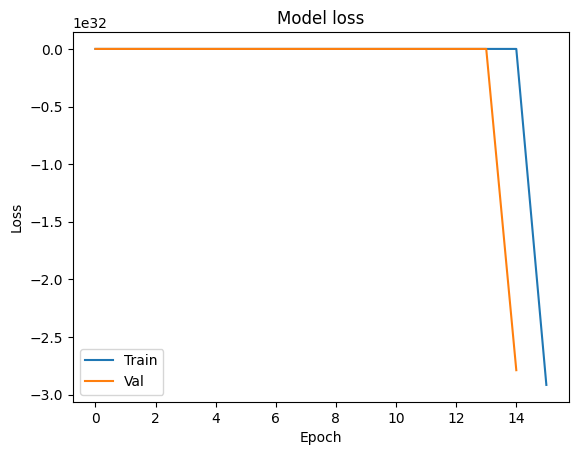

In [27]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [28]:
from keras.layers import Dropout
from keras import regularizers

In [29]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])